In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import itertools
from tqdm.auto import tqdm

In [2]:
import os

os.chdir('/home/hashikami/anaconda3/envs/Diff/content')

In [3]:
image_size = 28
channels = 1
batch_size = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(), # ピクセルの値を[0, 1]範囲に正規化
])

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=False,
    transform=transform
)

trainloader = DataLoader(
    trainset,
    batch_size=batch_size, # ミニバッチのサイズ
    shuffle=True,
    num_workers=2 #データロード時に使用するスレッド数
)

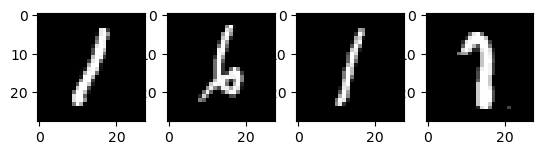

In [4]:
dataiter = iter(trainloader) # イテラブルへ
images, labels = next(dataiter) # 次のイタレーション

fig, axes = plt.subplots(1, 4)
for i in range(4):
  ax = axes[i]
  img = images[i].numpy().squeeze()
  ax.imshow(img, cmap='gray')

plt.show()

# 生成

In [5]:
from diffusion.diffusion_model.models.model4 import DenoiseModel
from diffusion.utils.utils import load_checkpoint


epochs = 500
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
denoise_model = DenoiseModel().to(device)
optimizer = optim.Adam(denoise_model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[int(epochs * ratio) for ratio in [0.5, 0.8]],
    gamma=0.2
)

In [6]:
# checkpointからスタート
denoise_model, optimizer, scheduler, start_epoch, loss = load_checkpoint(denoise_model, optimizer, scheduler, filename='checkpoint/checkpoint7.pth')

sampling loop time step:   0%|          | 0/150 [00:00<?, ?it/s]

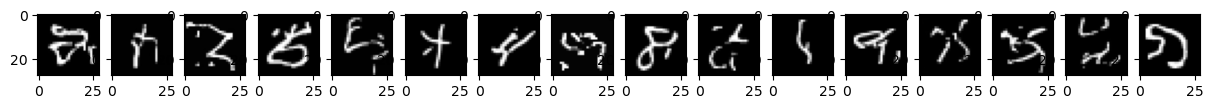

In [7]:
from diffusion.utils.sample import ddim_plot_samples

ddim_plot_samples(denoise_model, batch_size=16, timesteps=150)

sampling loop time step:   0%|          | 0/150 [00:00<?, ?it/s]

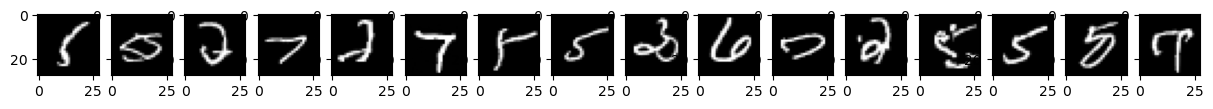

In [12]:
from diffusion.utils.sample import ddpm_plot_samples

ddpm_plot_samples(denoise_model, batch_size=16, timesteps=150)